In [49]:
import pandas as pd


In [50]:
df = pd.read_csv("sales_raw.csv")
print(df)

  Customer  Age  Product      Category    Amount     City
0    John    25   Laptop   Electronics  120000.0    Lagos
1     mary   22    Phone   electronics   85000.0    Abuja
2     PAUL   30   Tablet   Electronics       NaN   Ibadan
3      NaN   28   Laptop   Electronics  110000.0    Lagos
4    Grace   24  Headset   accessories   15000.0  Onitsha
5   Daniel   35    Phone   Electronics   90000.0    Abuja
6    Ruth    27   Laptop   electronics  125000.0    Lagos
7   Samuel   29   Tablet   Electronics   78000.0   Ibadan
8     Mary   22    Phone   Electronics   85000.0    Abuja
9    Peter   31  Headset   Accessories   18000.0    Enugu


In [51]:
# Remove whitespace
df.colums = df.columns.str.strip()
df["Customer"] = df["Customer"].str.strip().str.capitalize()
df["Category"] = df["Category"].str.strip().str.lower()
print(df)

  Customer  Age  Product     Category    Amount     City
0     John   25   Laptop  electronics  120000.0    Lagos
1     Mary   22    Phone  electronics   85000.0    Abuja
2     Paul   30   Tablet  electronics       NaN   Ibadan
3      NaN   28   Laptop  electronics  110000.0    Lagos
4    Grace   24  Headset  accessories   15000.0  Onitsha
5   Daniel   35    Phone  electronics   90000.0    Abuja
6     Ruth   27   Laptop  electronics  125000.0    Lagos
7   Samuel   29   Tablet  electronics   78000.0   Ibadan
8     Mary   22    Phone  electronics   85000.0    Abuja
9    Peter   31  Headset  accessories   18000.0    Enugu


C:\Users\USER\AppData\Local\Temp\ipykernel_11104\2815441351.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.strip()


In [52]:
# Standardize the category column
df["Category"] = df["Category"].replace({
    "electronics": "Electronics",
    "accessories": "Accessories"
})
print(df)

  Customer  Age  Product     Category    Amount     City
0     John   25   Laptop  Electronics  120000.0    Lagos
1     Mary   22    Phone  Electronics   85000.0    Abuja
2     Paul   30   Tablet  Electronics       NaN   Ibadan
3      NaN   28   Laptop  Electronics  110000.0    Lagos
4    Grace   24  Headset  Accessories   15000.0  Onitsha
5   Daniel   35    Phone  Electronics   90000.0    Abuja
6     Ruth   27   Laptop  Electronics  125000.0    Lagos
7   Samuel   29   Tablet  Electronics   78000.0   Ibadan
8     Mary   22    Phone  Electronics   85000.0    Abuja
9    Peter   31  Headset  Accessories   18000.0    Enugu


In [53]:
# Handling missing values
df["Customer"] = df["Customer"].fillna("Unknown")
df["Amount"] = df["Amount"].fillna(df["Age"].mean())

print(df)

  Customer  Age  Product     Category    Amount     City
0     John   25   Laptop  Electronics  120000.0    Lagos
1     Mary   22    Phone  Electronics   85000.0    Abuja
2     Paul   30   Tablet  Electronics      27.3   Ibadan
3  Unknown   28   Laptop  Electronics  110000.0    Lagos
4    Grace   24  Headset  Accessories   15000.0  Onitsha
5   Daniel   35    Phone  Electronics   90000.0    Abuja
6     Ruth   27   Laptop  Electronics  125000.0    Lagos
7   Samuel   29   Tablet  Electronics   78000.0   Ibadan
8     Mary   22    Phone  Electronics   85000.0    Abuja
9    Peter   31  Headset  Accessories   18000.0    Enugu


In [54]:
# Fix datatypes
df["Amount"] = df["Amount"].astype(int)
print(df)

  Customer  Age  Product     Category  Amount     City
0     John   25   Laptop  Electronics  120000    Lagos
1     Mary   22    Phone  Electronics   85000    Abuja
2     Paul   30   Tablet  Electronics      27   Ibadan
3  Unknown   28   Laptop  Electronics  110000    Lagos
4    Grace   24  Headset  Accessories   15000  Onitsha
5   Daniel   35    Phone  Electronics   90000    Abuja
6     Ruth   27   Laptop  Electronics  125000    Lagos
7   Samuel   29   Tablet  Electronics   78000   Ibadan
8     Mary   22    Phone  Electronics   85000    Abuja
9    Peter   31  Headset  Accessories   18000    Enugu


In [55]:
# Drop duplicates
df = df.drop_duplicates()
print(df)

  Customer  Age  Product     Category  Amount     City
0     John   25   Laptop  Electronics  120000    Lagos
1     Mary   22    Phone  Electronics   85000    Abuja
2     Paul   30   Tablet  Electronics      27   Ibadan
3  Unknown   28   Laptop  Electronics  110000    Lagos
4    Grace   24  Headset  Accessories   15000  Onitsha
5   Daniel   35    Phone  Electronics   90000    Abuja
6     Ruth   27   Laptop  Electronics  125000    Lagos
7   Samuel   29   Tablet  Electronics   78000   Ibadan
9    Peter   31  Headset  Accessories   18000    Enugu


In [56]:
# Save cleaned data
df.to_csv("cleaned.csv", index=False)


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Load cleaned data
df = pd.read_csv("../Visualization/cleaned.csv")
print(df)
 

  Customer  Age  Product     Category  Amount     City
0     John   25   Laptop  Electronics  120000    Lagos
1     Mary   22    Phone  Electronics   85000    Abuja
2     Paul   30   Tablet  Electronics      27   Ibadan
3  Unknown   28   Laptop  Electronics  110000    Lagos
4    Grace   24  Headset  Accessories   15000  Onitsha
5   Daniel   35    Phone  Electronics   90000    Abuja
6     Ruth   27   Laptop  Electronics  125000    Lagos
7   Samuel   29   Tablet  Electronics   78000   Ibadan
8    Peter   31  Headset  Accessories   18000    Enugu


<Axes: >

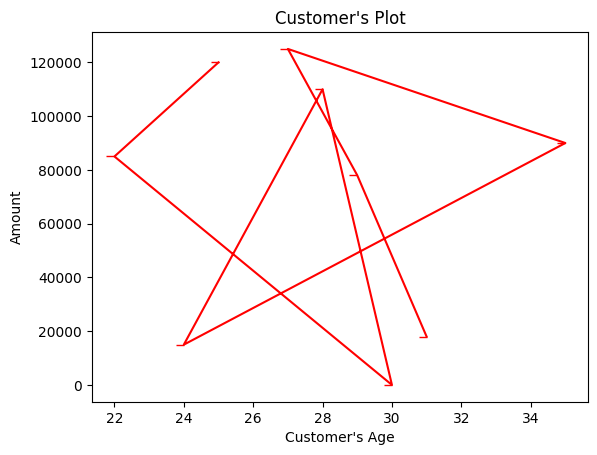

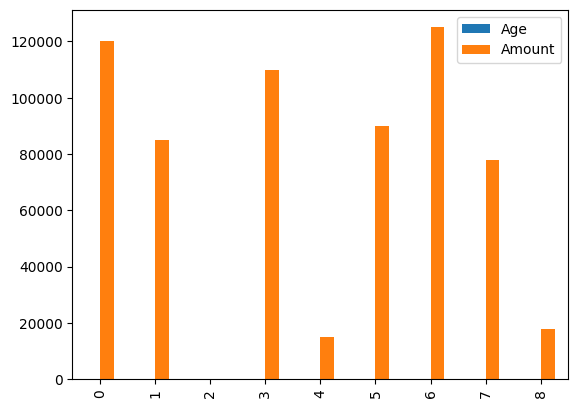

In [58]:
# Plotting 
plt.plot(df["Age"],df["Amount"], marker=0, color="Red")
plt.xlabel("Customer's Age")
plt.ylabel("Amount")
plt.title("Customer's Plot")
df.plot(kind='bar')

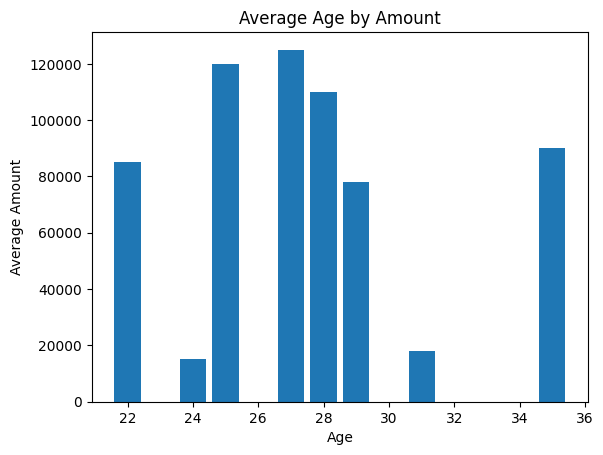

Age
22     85000.0
24     15000.0
25    120000.0
27    125000.0
28    110000.0
29     78000.0
30        27.0
31     18000.0
35     90000.0
Name: Amount, dtype: float64


In [ ]:
# Average Age by Amount

Age_avg = df.groupby("Age")["Amount"].mean()

plt.bar(Age_avg.index, Age_avg.values)
plt.xlabel("Age")
plt.ylabel("Average AmountW")
plt.title("Average Age by Amount")

plt.show()

print(Age_avg)
